In [7]:
import xarray as xr

In [2]:
ls /users/rsg/anla/scratch/network/

21_02_shiptracks/
aqua_modis/
CCI_OC_PRODUCTS_timeseries_level3_englishchannel_1D_19970904_19971031_area_weighting_False.nc
CCI_OC_PRODUCTS_timeseries_level3_englishchannel_1D_19970904_19971031_area_weighting_True.nc
CCI_OC_PRODUCTS_timeseries_level3_englishchannel_1D_19970904_19971031.nc
dask-worker-space/
modis_day_microphysics/
ocean_indicators_timeseries_output.ipynb
OLCI/


In [1]:
out_files = !find /users/rsg/anla/scratch/network/21_02_shiptracks/results/from_mageo/ -name "*nc"

In [4]:
file = "/users/rsg/anla/scratch/network/21_02_shiptracks/data/from_mageo/A2010125211500_day_microphysics_.nc"

In [2]:
files= !find /users/rsg/anla/scratch/network/modis_day_microphysics/raw/ -name "*.nc"
files = sorted(files)

In [3]:
files

['/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197000000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197000500_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197001000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197003500_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197004000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197004500_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197005000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197011000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197013000_day_microphysics_.nc',
 '/users/r

## validate that the stretching function works as expected:

In [8]:
from trollimage.xrimage import XRImage
def stretch_dataarray(x:xr.DataArray, stretch='histogram') -> xr.DataArray:
    '''perform a trollimage stretch operation with given method
    stretch is applied in-place and the enhancement attribute is updated'''
     
    xrimage = XRImage(x)
    
    xrimage.stretch(stretch=stretch)

    return xrimage.data

In [9]:
ds = xr.open_dataarray(file)

In [10]:
ds.transpose(...,'bands')

<xarray.DataArray 'day_microphysics' (y: 2030, x: 1354, bands: 3)>
[8245860 values with dtype=float64]
Coordinates:
  * bands      (bands) object 'R' 'G' 'B'
    longitude  (y, x) float64 ...
    latitude   (y, x) float64 ...
Dimensions without coordinates: y, x
Attributes:
    end_time:                2010-05-05 21:19:59.946528
    file_type:               hdf_eos_data_1000m
    mode:                    RGB
    optional_datasets:       []
    optional_prerequisites:  []
    platform_name:           EOS-Aqua
    prerequisites:           ["DataQuery(name='_day_microphysics_dep_0')", "D...
    resolution:              1000
    sensor:                  modis
    standard_name:           day_microphysics
    start_time:              2010-05-05 21:15:00.092688

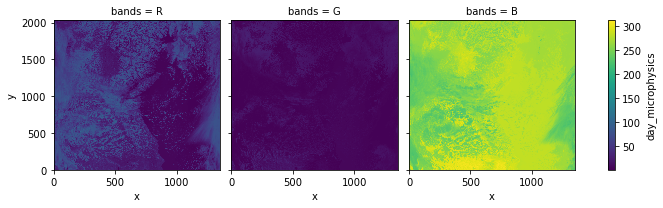

In [11]:
ds.plot(col='bands')

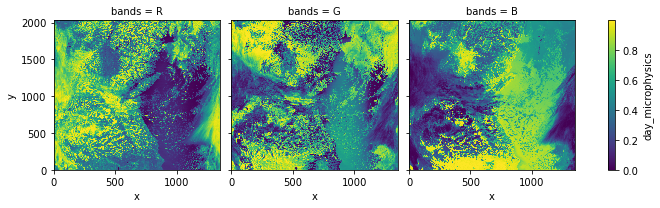

In [13]:
stretch_dataarray(ds).plot(col='bands')

In [50]:
files

['/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197000000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197000500_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197001000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197003500_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197004000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197004500_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197005000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197011000_day_microphysics_.nc',
 '/users/rsg/anla/scratch/network/modis_day_microphysics/raw/2002/07/16/A2002197013000_day_microphysics_.nc',
 '/users/r

In [124]:
from tqdm import tqdm
from matplotlib import pyplot as plt
from functools import reduce
import numpy as np

In [48]:
all_isnull = [bool(xr.open_dataarray(file).isnull().all()) for file in tqdm(files)]

100%|██████████| 166/166 [00:33<00:00,  4.98it/s]


## create a universal histogram stretch for modis day-microphysics
Let us use bootstrap to obtain a histogram for each band that we are confident represents the general distribution of intensities across RGB bands in modis day_microphysics granules. Is there any need to weight by pixel area?

In [152]:
valid_files = [a[0] for a in filter(lambda a:a[1], list(zip(files,all_isnull)))]

In [153]:
[bool(xr.open_dataarray(file).isnull().all()) for file in tqdm(valid_files)]

100%|██████████| 86/86 [00:14<00:00,  5.95it/s]


[True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True]

In [145]:
all_isnull

[False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 False,
 False,
 False,
 True,
 False,
 False,
 False,
 False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False,
 False,
 False,
 False

In [164]:
values = {}
for band in 'RGB':
    values[band]= [xr.open_dataarray(file).sel(bands=band).data.flat for file in valid_files[:]]

ValueError: shape mismatch: objects cannot be broadcast to a single shape

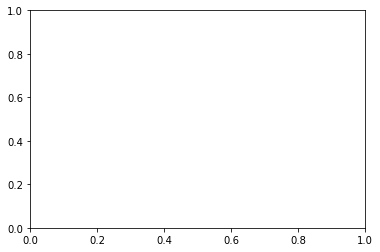

In [179]:
plt.bar(*r_hist)

In [137]:
for var in ds.to_dataset(dim='bands').data_vars:
    np.histogram(ds.to_dataset(dim='bands')[var])

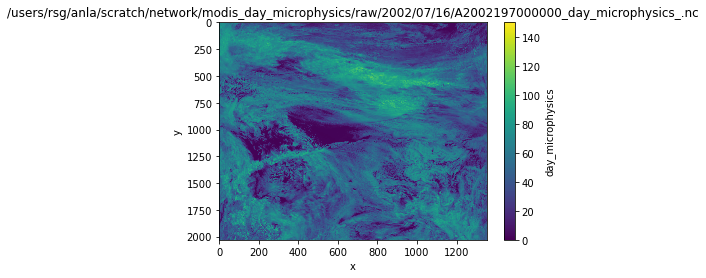

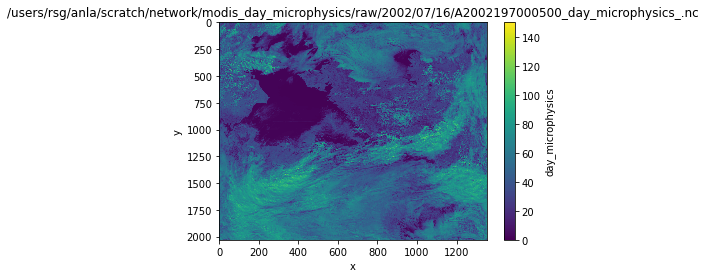

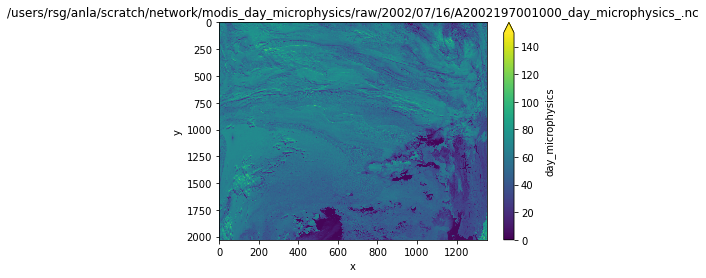

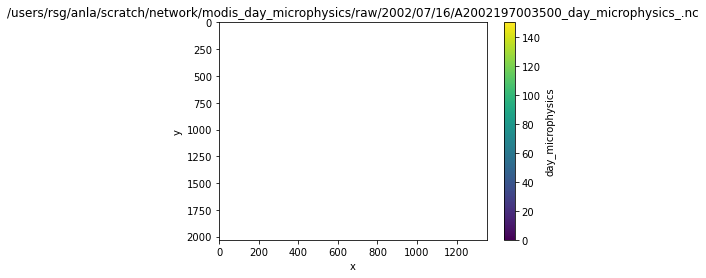

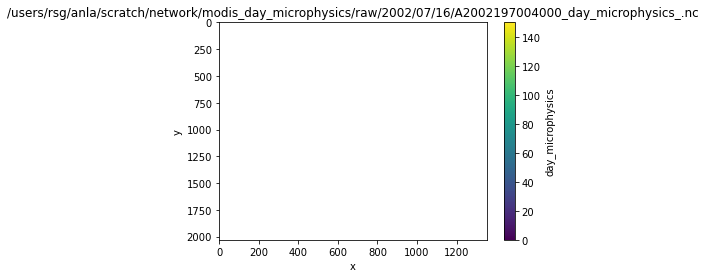

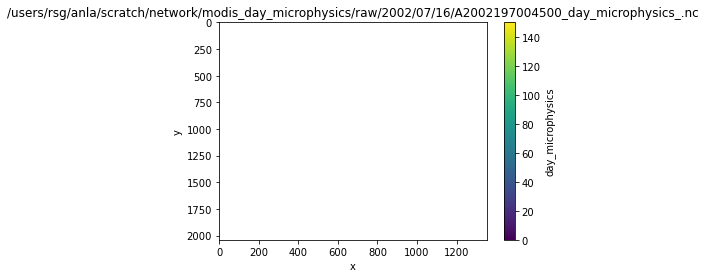

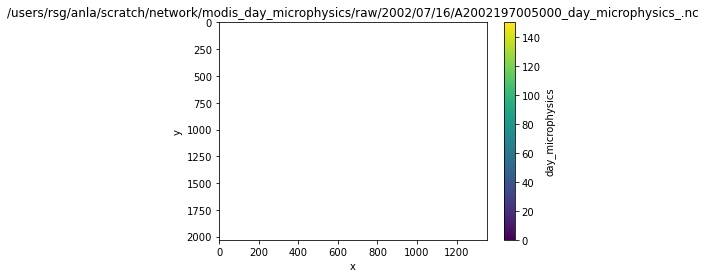

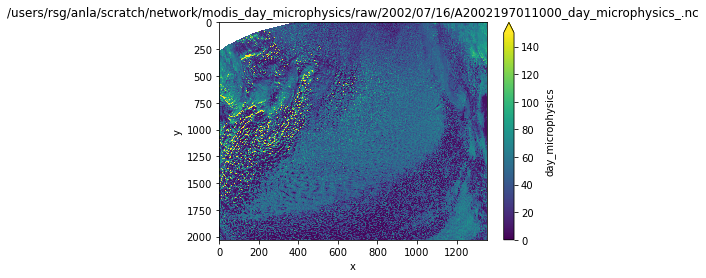

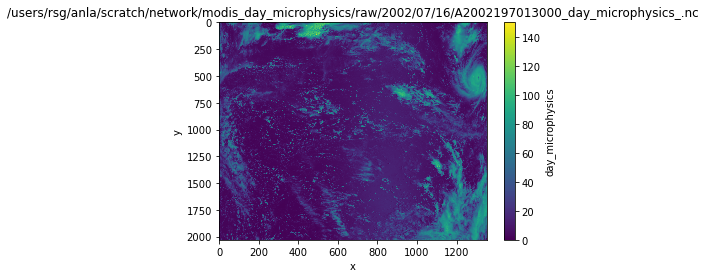

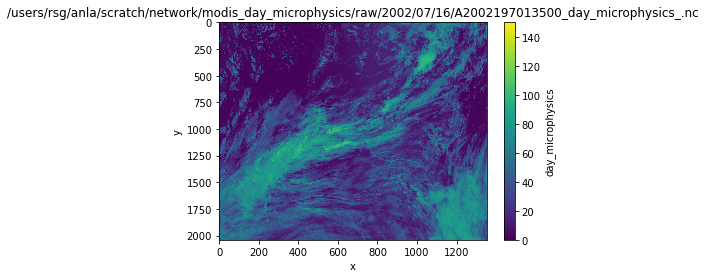

In [80]:
for file, isnull in zip(files[:10], all_isnull[:10]):
    
    
    
#     if isnull==False:
    plt.figure()
    ds = xr.open_dataarray(file)
#         ds = (ds+ds.min())/512
    ds.isel(bands=0).plot.imshow(origin='upper',vmin=0,vmax=150)
    plt.title(file)
    plt.show()